# ML Model Development - VGG16

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# Define path to dataset directory
dataset_dir = "../DataPreprocessing/FinalDataset_800/"

# Define image size for resizing
image_size = (224, 224)  # Use 224x224 for VGG16

# Define the number of classes
num_classes = len(os.listdir(dataset_dir))

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale pixel values to [0, 1]
    rotation_range=30,  # Increased rotation range
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,  # Added shear range
    zoom_range=0.2,  # Added zoom range
    horizontal_flip=True,
    validation_split=0.2
)

# Load the pre-trained model (VGG16)
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(*image_size, 3)
)

# Add custom layers for classification with dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)  # Reduced dense layer size
x = Dropout(0.5)(x)  # Increased dropout rate
predictions = Dense(num_classes, activation="softmax")(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Print a summary of the model architecture
model.summary()

# Create data generators for training and validation
batch_size = 32
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)
valid_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Define a model checkpoint to save the best model in ".h5" format
checkpoint = ModelCheckpoint("VGG16_best_model_800.h5", save_best_only=True, verbose=1)

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with increased epochs
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator,
    callbacks=[checkpoint, early_stopping]  # Save the best model and early stopping
)

# Load the best model for evaluation
best_model = keras.models.load_model("VGG16_best_model_800.h5")

# Evaluate the model on the validation dataset
valid_generator.reset()
valid_loss, valid_accuracy = best_model.evaluate(valid_generator)

# Evaluate the model on the test dataset
test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)
test_loss, test_accuracy = best_model.evaluate(test_generator)

print(f"Validation Loss: {valid_loss:.4f}")
print(f"Validation Accuracy: {valid_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

c:\Users\niwar\anaconda3\envs\cucumber-dev\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 1309s 13s/step - loss: 1.3577 - accuracy: 0.3906 - val_loss: 0.7672 - val_accuracy: 0.7300
Epoch 2/20
100/100 [==============================] - ETA: 0s - loss: 0.8653 - accuracy: 0.6463 
Epoch 2: val_loss did not improve from 0.76721
100/100 [==============================] - 1352s 14s/step - loss: 0.8653 - accuracy: 0.6463 - val_loss: 1.0166 - val_accuracy: 0.5038
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 0.4183 - accuracy: 0.8403 
Epoch 3: val_loss improved from 0.76721 to 0.34120, saving model to VGG16_best_model_800.h5
100/100 [==============================] - 1308s 13s/step - loss: 0.4183 - accuracy: 0.8403 - val_loss: 0.3412 - val_accuracy: 0.8813
Epoch 4/20
100/100 [==============================] - ETA: 0s - loss: 0.2182 - accuracy: 0.9191 
Epoch 4: val_loss improved from 0.34120 to 0.19320, saving model to VGG16_best_model_800.h5
100/100 [==============================] - 1301s 13s/step - loss: 0.2182 - a

###  Plots for accuracy and loss curves

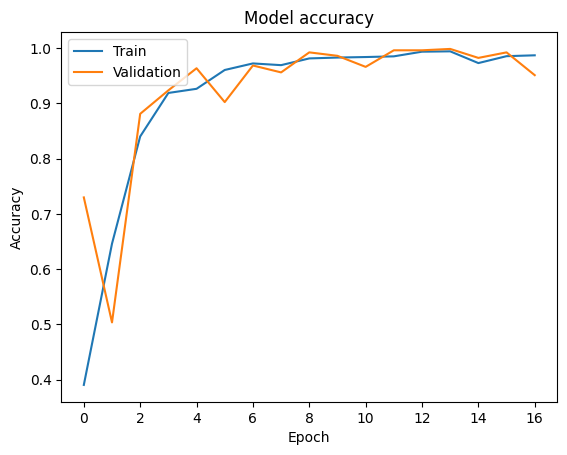

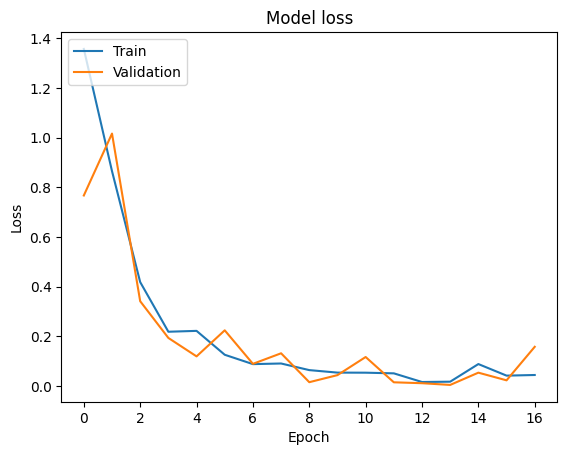

In [2]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## VGG16 Model Evaluation

25/25 [==============================] - 83s 3s/step - loss: 0.0093 - accuracy: 0.9975
Found 800 images belonging to 5 classes.
25/25 [==============================] - 82s 3s/step - loss: 0.0049 - accuracy: 0.9987
Validation Loss: 0.0093
Validation Accuracy: 99.75%
Test Loss: 0.0049
Test Accuracy: 99.87%


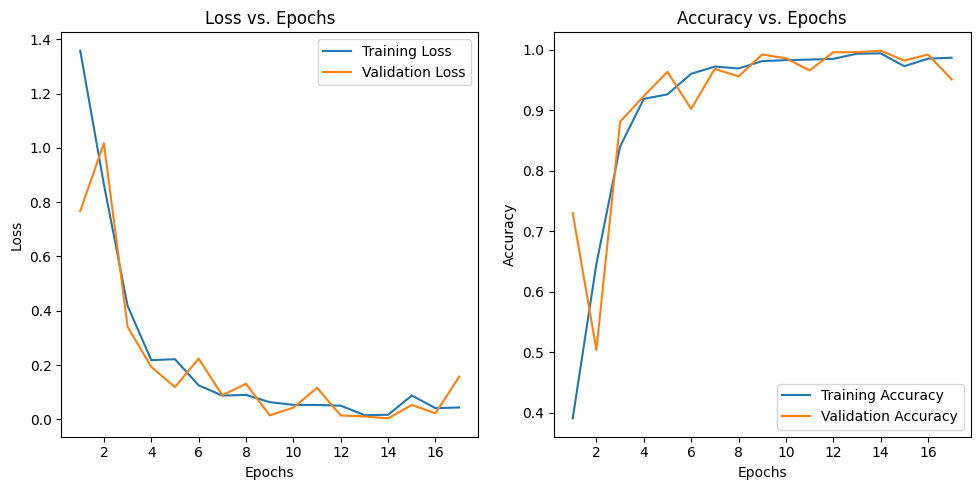

In [3]:
# Evaluate the model
best_model = keras.models.load_model("VGG16_best_model_800.h5")

# Evaluate the model on the validation dataset
valid_generator.reset()
valid_loss, valid_accuracy = best_model.evaluate(valid_generator)

# Evaluate the model on the test dataset
test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)
test_loss, test_accuracy = best_model.evaluate(test_generator)

print(f"Validation Loss: {valid_loss:.4f}")
print(f"Validation Accuracy: {valid_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Extract the history for plotting
import matplotlib.pyplot as plt

# Use 'history' from the training process to access loss and accuracy values
train_loss = history.history['loss']
valid_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
valid_accuracy = history.history['val_accuracy']

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(valid_loss) + 1), valid_loss, label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(122)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(valid_accuracy) + 1), valid_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### Confusion Matrix

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get the true labels for the validation dataset
true_labels = valid_generator.classes

# Generate predictions for the validation dataset using the best model
valid_generator.reset()
predicted_probabilities = best_model.predict(valid_generator)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Extract TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Get class names
class_names = list(valid_generator.class_indices.keys())

# Print the confusion matrix, TP, TN, FP, FN, and classification report
print("Confusion Matrix:")
print(cm)

print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

print("\nClass Names:")
print(class_names)

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:")
print(report)


25/25 [==============================] - 83s 3s/step
Confusion Matrix:
[[38 30 36 30 26]
 [33 36 28 36 27]
 [36 28 31 32 33]
 [27 37 30 32 34]
 [25 31 34 30 40]]
True Positives (TP): 36
True Negatives (TN): 38
False Positives (FP): 30
False Negatives (FN): 33

Class Names:
['Healthy leaves', 'downy mildew stage 1', 'downy mildew stage 2', 'powdery mildew stage 1', 'powdery mildew stage 2']

Classification Report:
                        precision    recall  f1-score   support

        Healthy leaves       0.24      0.24      0.24       160
  downy mildew stage 1       0.22      0.23      0.22       160
  downy mildew stage 2       0.19      0.19      0.19       160
powdery mildew stage 1       0.20      0.20      0.20       160
powdery mildew stage 2       0.25      0.25      0.25       160

              accuracy                           0.22       800
             macro avg       0.22      0.22      0.22       800
          weighted avg       0.22      0.22      0.22       800

